In [1]:
#pwp CIA3 Feni Martina Fernando 1927958
print("Business Understanding \n There is a growth in recipe applications, online cooking recipes associated with ingredients and cooking procedures are available, but there is need to build a model which can recommend recipes by users taste, so this project is to implement a recommendation menu planning mechanism which recommends a set of recipes by user preferences.\n 1) Plan menu of their choices.\n 2) To provide the best recipes.\n 3) To recommend top food recipes based on user interest\n")

print(" Visualization used \n 1) Bar graphs \n 2) Box plots \n 3) Word Cloud \n 4) Horizantal bar harphs")



Business Understanding 
 There is a growth in recipe applications, online cooking recipes associated with ingredients and cooking procedures are available, but there is need to build a model which can recommend recipes by users taste, so this project is to implement a recommendation menu planning mechanism which recommends a set of recipes by user preferences.
 1) Plan menu of their choices.
 2) To provide the best recipes.
 3) To recommend top food recipes based on user interest

 Visualization used 
 1) Bar graphs 
 2) Box plots 
 3) Word Cloud 
 4) Horizantal bar harphs


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')



In [3]:
data1=pd.read_excel("E:/project/food/main.xlsx")

In [4]:
data1.isnull().sum().sum()

809

In [5]:
data1.fillna(0,inplace=True)

In [6]:
data1.isnull().sum().sum()

0

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 14 columns):
food                444 non-null object
food-href           444 non-null object
name                444 non-null object
ingredients         444 non-null object
description         444 non-null object
key_ingredients     444 non-null object
about it            444 non-null object
difficulty level    444 non-null object
recipe serving      444 non-null object
total cook time     444 non-null object
cook_time           444 non-null object
image-src           444 non-null object
pages               444 non-null object
pages-href          444 non-null object
dtypes: object(14)
memory usage: 48.6+ KB


In [8]:
data1.shape # 444  observations, 14 columns

(444, 14)

In [9]:
print("The training data consists of {} recipes".format(len(data1)))

The training data consists of 444 recipes


In [10]:
print("First five elements in our training sample:")
data1.head()

First five elements in our training sample:


,food,food-href,name,ingredients,description,key_ingredients,about it,difficulty level,recipe serving,total cook time,cook_time,image-src,pages,pages-href
0,Riceless Chicken Biryani,https://food.ndtv.com/recipe-riceless-chicken-...,Riceless Chicken Biryani Recipe,1 tsp malabar peppercorn1 Cinnamon stick6 Gr...,"1.Heat pan add malabar peppercorns, cinnamon s...","malabar peppercorn, Cinnamon stick, Green ca...",About Riceless Chicken Biryani Recipe: A birya...,0,Prep Time: 10 mins,0,45 mins,https://c.ndtvimg.com/61n9j7p_riceless-chicken...,Rice Recipes,https://food.ndtv.com/recipes/rice-recipes
1,Almond Pearls,https://food.ndtv.com/recipe-almond-pearls-952560,Almond Pearls Recipe,60 Gram Toasted almonds10 Gram Blueberries1 Tb...,1.Toast the oats in a dry pan for 2 minutes. R...,"Toasted almonds, Blueberries, Oats, Corn fla...",About Almond Pearls Recipe: Toasted almonds mi...,Difficulty Level: Easy,Prep Time: 10 mins,0,20 mins,https://c.ndtvimg.com/go13jngg_almond-pearls_6...,0,0
2,Bread Dahi Vada,https://food.ndtv.com/recipe-bread-dahi-vada-5...,Bread Dahi Vada Recipe,10 Bread slices200 gram CurdTo fry Oil to ta...,1.Remove the brown portion from all slices.2.S...,"Bread slices, Curd, Oil, Salt and black pepp...",About Bread Dahi Vada Recipe: An innovative tw...,Difficulty Level: Easy,Prep Time: 10 mins,0,35 mins,https://c.ndtvimg.com/2020-01/4isrt93o_dahi-va...,Bread Recipes,https://food.ndtv.com/recipes/breads-recipes
3,Banana Phirni Tartlets With Fresh Strawberries,https://food.ndtv.com/recipe-banana-phirni-tar...,Banana Phirni Tartlets with Fresh Strawberries...,1 Cup Basmati rice (soaked in water)1/2 Cup Mi...,"1.Combine flour, butter and sugar in a food pr...","Basmati rice (soaked in water), Milk, Cardam...",Milk thickened with rice flour and flavoured w...,0,Prep Time: 10 mins,0,1 hr 30 mins,https://i.ndtvimg.com/i/2018-04/tartlets_620x3...,Kids Recipes,https://food.ndtv.com/recipes/kids-recipes
4,Fruit Cube Salad,https://food.ndtv.com/recipe-fruit-cube-salad-...,Fruit Cube Salad Recipe,Watermelon Cantaloupe Kiwifruiit Pineapple ...,1.Use fruit that will survive being cut into c...,"Watermelon, Cantaloupe, Kiwifruiit, Pineappl...",About Fruit Cube Salad Recipe: A recipe with a...,0,Prep Time: 10 mins,0,30 mins,https://i.ndtvimg.com/i/2018-03/fruit-salad_62...,Breakfast Recipes,https://food.ndtv.com/recipes/breakfast-recipes


In [11]:
data1.describe()

,food,food-href,name,ingredients,description,key_ingredients,about it,difficulty level,recipe serving,total cook time,cook_time,image-src,pages,pages-href
count,444,444,444,444,444,444,444,444,444,444,444,444,444,444
unique,443,444,443,438,438,391,418,4,37,31,38,396,15,15
top,Kiwi Margarita,https://food.ndtv.com/recipe-dhaba-raan-709203,Kiwi Margarita Recipe,0,0,0,0,0,Prep Time: 10 mins,0,0,0,0,0
freq,2,1,2,7,7,54,27,353,116,165,42,45,51,51


In [12]:
print("Number of cuisine categories: {}".format(len(data1.pages.unique())))
data1.pages.unique()

Number of cuisine categories: 15


array(['Rice Recipes', 0, 'Bread Recipes', 'Kids Recipes',
       'Breakfast Recipes', 'Winter Recipes', 'Drinks', 'Dinner Recipes',
       'Chicken Recipes', 'Vegetarian Recipes', 'Seafood Recipes',
       'Desserts', 'Meat Recipes', 'Snacks Recipes', 'Festivals'],
      dtype=object)

In [13]:
#Define a function to generate randoms colors for further visualizations
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [14]:
trace = go.Table(
                header=dict(values=['Cuisine','Number of recipes'],
                fill = dict(color=['#EABEB0']), 
                align = ['left'] * 5),
                cells=dict(values=[data1.pages.value_counts().index,data1.pages.value_counts()],
                align = ['left'] * 5))

layout = go.Layout(title='Number of recipes in each cuisine category',
                   titlefont = dict(size = 20),
                   width=500, height=650, 
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   autosize = False,
                   margin=dict(l=20,r=20,b=1,t=30,pad=1),
                   )
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig)

In [15]:
trace = go.Table(
                header=dict(values=['cook_time','Number of recipes'],
                fill = dict(color=['#EABEB0']), 
                align = ['left'] * 5),
                cells=dict(values=[data1.cook_time.value_counts().index,data1.cook_time.value_counts()],
                align = ['left'] * 5))

layout = go.Layout(title='Number of recipes in each cuisine category',
                   titlefont = dict(size = 20),
                   width=500, height=650, 
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   autosize = False,
                   margin=dict(l=20,r=20,b=1,t=30,pad=1),
                   )
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig)

In [16]:
#  Label distribution in percents
labelpercents = []
for i in data1.pages.value_counts():
    percent = (i/sum(data1.pages.value_counts()))*100
    percent = "%.2f" % percent
    percent = str(percent + '%')
    labelpercents.append(percent)

In [17]:
trace = go.Bar(
            x=data1.pages.value_counts().values[::-1],
            y= [i for i in data1.pages.value_counts().index][::-1],
            text =labelpercents[::-1],  textposition = 'outside', 
            orientation = 'h',marker = dict(color = random_colours(20)))
layout = go.Layout(title='Number of recipes in each cuisine category',
                   titlefont = dict(size = 25),
                   width=1030, height=450, 
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   
                   margin=dict(l=75,r=110,b=50,t=60),
                   )
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig, filename='horizontal-bar')

In [18]:
print('Maximum Number of Ingredients in a Dish: ',data1['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',data1['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  907.0
Minimum Number of Ingredients in a Dish:  43.0


In [19]:
trace = go.Bar(
            x=data1.cook_time.value_counts().values[::-1],
            y= [i for i in data1.cook_time.value_counts().index][::-1],
            text =labelpercents[::-1],  textposition = 'outside', 
            orientation = 'h',marker = dict(color = random_colours(20)))
layout = go.Layout(title='Count of cooking time',
                   titlefont = dict(size = 25),
                   width=1030, height=450, 
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   
                   margin=dict(l=75,r=110,b=50,t=60),
                   )
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig, filename='horizontal-bar')

In [20]:
#Box plot
boxplotcolors = random_colours(21)
labels = [i for i in data1.pages.value_counts().index][::-1]
data = []
for i in range(15):
    trace = {
            "type": 'violin',
            "y": data1[data1['pages'] == labels[i]]['ingredients'].str.len(),
            "name": labels[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)
layout = go.Layout(
    title = "Recipe Length Distribution by cuisine"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Box Plot Styling Outliers")

Word Cloud Function for cusine..


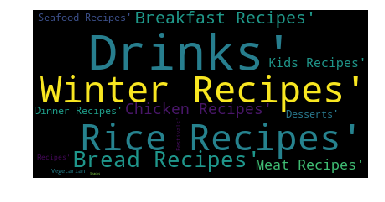

In [21]:
#Word cloud and sea born as similar visualization techniques
print("Word Cloud Function for cusine..")
stopwords = set(STOPWORDS)
size = (20,10)
    
text = data1['pages'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word Cloud Function for ingredients


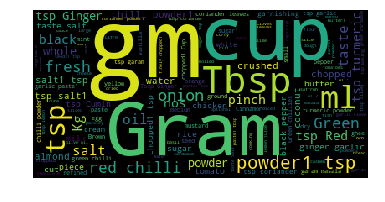

In [22]:
print("Word Cloud Function for ingredients")
text1 = data1['ingredients'].values 

wordcloud = WordCloud().generate(str(text1))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word Cloud Function for key ingredients


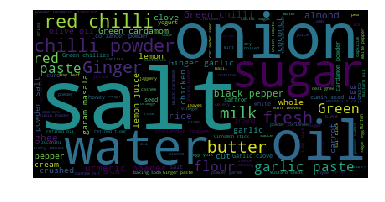

In [23]:
print("Word Cloud Function for key ingredients")
text2 = data1['key_ingredients'].values 

wordcloud = WordCloud().generate(str(text2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
print("Results \n From the EDA we can say that there are a lot of missing values \n There are no duplicate food recipe \n There are 15 cuisine category \n The maximum number of recipes are of drinks \n Most of the recipes are made in 30-40 mins \n There are word clouds which shows what type of recipes, the ingredients and key ingredients are more. \n The most of the key ingredients are which are available at home itself.\n \nRecommendation: \n Further analysis can be done for food recommendation using collaborative filtering.")

Results 
 From the EDA we can say that there are a lot of missing values 
 There are no duplicate food recipe 
 There are 15 cuisine category 
 The maximum number of recipes are of drinks 
 Most of the recipes are made in 30-40 mins 
 There are word clouds which shows what type of recipes, the ingredients and key ingredients are more. 
 The most of the key ingredients are which are available at home itself.
 
Recommendation: 
 Further analysis can be done for food recommendation using collaborative filtering.
